In [1]:
# Capstone
import openpyxl
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE

referrals = pd.read_excel(r"C:\Users\이희창\Downloads\opd.xlsx", engine='openpyxl')

df = referrals
print(referrals['transplanted'].value_counts())
print(referrals['transplanted'].unique())

# PatientID, HospitalID 및 outcome으로 시작하는 변수들을 원본 데이터프레임(df)에서 제거
outcome_columns = [col for col in df.columns if col.startswith('outcome_')]
columns_to_drop = ['PatientID', 'HospitalID'] + outcome_columns

print("제거할 변수들:", columns_to_drop)

# 원본 데이터프레임에서 선택된 변수들 제거
df = df.drop(columns=columns_to_drop, axis=1)
print(f"변수 제거 후 원본 데이터프레임 크기: {df.shape}")





df_new = df.copy()
def total_values(df,col,list_features,label):
  for i in list_features:
    #print(col,i)
    #Change each column value to the new label based on classification framework
    df[col].mask(df[col]==i, label, inplace=True)





infections=['Sepsis','Septic Shock','Infectious Disease - Bacterial','Infectious Disease - Viral',
            'Infectious Disease - Other, specify','Pneumonia','HIV','Hepatitis','AIDS/HIV']
total_values(df_new,'Cause_of_Death_OPO',infections,'Infectious Disease')

# Cardio
cardio=['CHF','CAR - CHF','AAA or thoracic AA', 'AAA - abdominal aortic aneurysm', 'CAR - cardiomegaly/cardiomyopathy/cardiovascular',
        'Pulmonary embolism','PE--Pulmonary Embolism ','Myocardial infarction',
        'CAR - MI', 'CAR - probable MI', 'CAR - arrhythmia',
        'Arrhythmia','Cardiac - Other, specify']
total_values(df_new,'Cause_of_Death_OPO',cardio,'Circulatory Disease')

# Respiratory
resp=['Anoxia','COPD','RES - COPD', 'Respiratory - Other','Respiratory - Other, specify',
      'RES - other', 'RES - pneumonia', 'RES - lung disease', 'RES - asthma',
      'RES - aspiration']
total_values(df_new,'Cause_of_Death_OPO',resp,'Respiratory Disease')

# Newborn/perinatal
newborn=['Fetal Demise','Prematurity','Sudden infant death syndrome',
         'PED - abuse/shaken baby']
total_values(df_new,'Cause_of_Death_OPO',newborn,'Newborn Disease')

# Cancers
cancers=['Leukemia / Lymphoma','Cancer', 'Cancer - Leukemia/Lymphoma','Cancer/Current or within five years']
total_values(df_new,'Cause_of_Death_OPO',cancers,'Cancer')

# Neurological
neuro=['CVA/Stroke - Cerebro Accident','ICB / ICH', 'Cerebrovascular / Stroke',
       'CNS Tumor','SAH','Meningitis','Seizure/Seizure Disorder', 'Aneurysm',
       ]
total_values(df_new,'Cause_of_Death_OPO',neuro,'Nervous Disease')

# Digestive
digestive=['GI - necrotic bowel','GI - bleed','GI - bowel perforation','GI - bowel obstruction']
total_values(df_new,'Cause_of_Death_OPO',digestive,'Digestive Disease')

# Liver
liver=['Liver Disease/Failure','ESLD']
total_values(df_new,'Cause_of_Death_OPO',liver,'Liver Disease')

# Kidney
kidney=['ESRD','Kidney/Renal  Disease']
total_values(df_new,'Cause_of_Death_OPO',kidney,'Kidney Disease')

# Eye
eye=['PED - other', 'PED - premature']
total_values(df_new,'Cause_of_Death_OPO',eye,'Eye Disease')

# Injuries, mostly external
injury=['GSW','TR - GSW','Drowning','Head Trauma','Trauma','Overdose',
        'Drug Overdose/Probable Drug Abuse','An - other', 'An - asphyixiation',
        'An - smoke inhalation','An -  hanging', 'An - drowning',
        'TR - MVA', 'TR - other', 'TR - other', 'TR - CHI - Closed Head Injury',
        'TR - burns', 'TR - stabbing', 'TR - electrocution','Poisoning',
        'Intracranial Hemorrhage','Exsanguination']
total_values(df_new,'Cause_of_Death_OPO',injury,'Injury_External Causes')

# Multisystem
multi=['Multi-system failure', 'MultiSystem Failure']
total_values(df_new,'Cause_of_Death_OPO',multi,'Multi-system failure')

# Other
other=['Other','Other, specify']
total_values(df_new,'Cause_of_Death_OPO',other,'Other')

#Cluster categories: cause of death UNOS

infections=['Sepsis','Infectious Disease - Bacterial','Infectious Disease - Viral','Infectious Disease - Other, specify','Pneumonia','HIV','Hepatitis']
total_values(df_new,'Cause_of_Death_UNOS',infections,'Infectious Disease')

cardio=['CHF','AAA or thoracic AA', 'Pulmonary embolism','Myocardial infarction','Arrhythmia','Cardiac - Other, specify']
total_values(df_new,'Cause_of_Death_UNOS',cardio,'Circulatory Disease')

resp=['Anoxia','COPD','Respiratory - Other','Respiratory - Other, specify']
total_values(df_new,'Cause_of_Death_UNOS',resp,'Respiratory Disease')

newborn=['Fetal Demise','Prematurity','Sudden infant death syndrome']
total_values(df_new,'Cause_of_Death_UNOS',newborn,'Newborn Disease')

cancers=['Leukemia / Lymphoma','Cancer']
total_values(df_new,'Cause_of_Death_UNOS',cancers,'Cancer')

neuro=['CVA/Stroke','ICB / ICH', 'Cerebrovascular / Stroke', 'CNS Tumor','SAH']
total_values(df_new,'Cause_of_Death_UNOS',neuro,'Nervous Disease')

injury=['GSW','Drowning','Head Trauma','Trauma','Overdose',
        'Exsanguination']
total_values(df_new,'Cause_of_Death_UNOS',injury,'Injury_External Causes')

other=['Other','Other, specify']
total_values(df_new,'Cause_of_Death_UNOS',other,'Other')

# Replace names to keep consistent with OPO category change
df_new['Cause_of_Death_UNOS'].replace('ESRD', 'Kidney Disease', inplace=True)
df_new['Cause_of_Death_UNOS'].replace('ESLD', 'Liver Disease', inplace=True)

# Cluster categories: mechanism of death

# Taking only natural causes
natural_causes=['Natural Causes','Death from Natural Causes']
total_values(df_new,'Mechanism_of_Death',natural_causes,'Natural Causes')

# Taking only injuries and external causes: blunt injury, drug intoxication, gunshot wound, asphyxiation, drowning, stab, electrical
injury_external=['Blunt Injury','Drug Intoxication','Gun Shot Wound','Asphyxiation','Drug / Intoxication',
                 'Drowning','Gunshot Wound','Stab','Electrical']
total_values(df_new,'Mechanism_of_Death',injury_external,'Injury_External Causes')

# Taking only nervous system related disorders: stroke, seizure
nervous_diseases=['ICH/Stroke','Intracranial Hemmorrhage / Stroke','Seizure']
total_values(df_new,'Mechanism_of_Death',nervous_diseases,'Nervous Disease')

# None of the above
nofa=['None of the Above','None of the above']
total_values(df_new,'Mechanism_of_Death',nofa,'Other')

# Cluster categories: Circumstances of Death

# Taking only natural causes
natural_causes=['Natural Causes','Death from Natural Causes']
total_values(df_new,'Circumstances_of_Death',natural_causes,'Natural Causes')

# Taking only motor vehicle accidents
mva=['Motor Vehicle Accident','MVA']
total_values(df_new,'Circumstances_of_Death',mva,'Motor Accident')

# Taking only non-motor vehicle accidents
non_mva=['Non-Motor Vehicle Accident','Accident, Non-MVA']
total_values(df_new,'Circumstances_of_Death',non_mva,'Non-motor Accident')

# Suicide - real or alleged
suicide=['Suicide','Alleged Suicide']
total_values(df_new,'Circumstances_of_Death',suicide,'Suicide')

# Homicide - real or alleged
homicide=['Homicide','Alleged Homicide']
total_values(df_new,'Circumstances_of_Death',homicide,'Homicide')

# Child Abuse - real or alleged
child_abuse=['Child Abuse','Alleged Child Abuse']
total_values(df_new,'Circumstances_of_Death',child_abuse,'Homicide')

# Other/none of the above
other=['Other','None of the Above']
total_values(df_new,'Circumstances_of_Death',other,'Other')



#Feature engineering: dealing with time
def get_duration_between_dates(then, now, interval = "default"):

    """
    Returns a duration as specified by variable interval.
    Used to calculate new feature of time authorized - time approached.

    Code source: https://stackoverflow.com/questions/1345827/how-do-i-find-the-time-difference-between-two-datetime-objects-in-python

    Parameters
    ----------
    then (DateTime): a date-time.
    now (DateTime): another date-time.
    interval (string): type of duration metric, e.g. minutes.

    Returns
    -------
    (float): A float with the duration in interval units.
    """

    duration = now - then # For build-in functions
    duration_in_s = duration.total_seconds()

    def years():
      return divmod(duration_in_s, 31536000) # Seconds in a year=31536000.

    def days(seconds = None):
      return divmod(seconds if seconds != None else duration_in_s, 86400) # Seconds in a day = 86400

    def hours(seconds = None):
      return divmod(seconds if seconds != None else duration_in_s, 3600) # Seconds in an hour = 3600

    def minutes(seconds = None):
      return divmod(seconds if seconds != None else duration_in_s, 60) # Seconds in a minute = 60

    def seconds(seconds = None):
      if seconds != None:
        return divmod(seconds, 1)
      return duration_in_s

    def totalDuration():
        y = years()
        d = days(y[1]) # Use remainder to calculate next variable
        h = hours(d[1])
        m = minutes(h[1])
        s = seconds(m[1])

        return "Time between dates: {} years, {} days, {} hours, {} minutes and {} seconds".format(int(y[0]), int(d[0]), int(h[0]), int(m[0]), int(s[0]))

    return {
        'years': float(years()[0]),
        'days': float(days()[0]),
        'hours': float(hours()[0]),
        'minutes': float(minutes()[0]),
        'seconds': float(seconds()),
        'default': totalDuration()
    }


def create_time_column(df,col1,col2,new_col_name):
  """
  Create new column to describe the number of hours between administrative milestones,
  e.g. between referral (death) and approach.

  Parameters
  ----------
  df (DataFrame): input data.
  col1 (string): name of column representing one timepoint.
  col2 (string): name of column representing another timepoint.
  new_col_name (string): new column name representing a time category between time points.

  Returns
  -------
  df (DataFrame): modified df with new column.

  """
  def convert_datetime(str1,str2):
    # Helper function to convert to datetime
    return [pd.to_datetime(str1), pd.to_datetime(str2)]

  time_category = []
  for row in zip(df[col1], df[col2]):
    if pd.isnull(row[0])==False and pd.isnull(row[1])==False:
      date_row=convert_datetime(row[0],row[1])
      time_elapsed=abs(get_duration_between_dates(date_row[0],date_row[1])['hours'])

      if time_elapsed <= 24:
        time_category.append('Within 24 hours')

      if time_elapsed > 24:
        time_category.append('Over 24 hours')

    else:
      time_category.append('Milestone not reached')

  df[new_col_name]=time_category

  return df


# Define timepoint variables
time_vars = ['time_asystole','time_referred', 'time_approached', 'time_authorized', 'time_procured','time_brain_death']

# Get category of intervals between them
asystole_to_referred = 'time_asystole_to_referred'
df_new = create_time_column(df_new,time_vars[0],time_vars[2], asystole_to_referred)

brain_death_to_referred = 'time_brain_death_to_referred'
df_new = create_time_column(df_new,time_vars[1],time_vars[2], brain_death_to_referred)

referred_to_approached = 'time_referred_to_approached'
df_new = create_time_column(df_new,time_vars[2],time_vars[3], referred_to_approached)

approached_to_authorized = 'time_approached_to_authorized'
df_new = create_time_column(df_new,time_vars[3],time_vars[4], approached_to_authorized)

authorized_to_procured = 'time_authorized_to_procured'
df_new = create_time_column(df_new,time_vars[4],time_vars[5], authorized_to_procured)


def get_missing_data(data):
  missing_data_prop={}
  for x,y in enumerate(list(data.isnull().sum())):
    missing_data_prop[data.columns[x]]=(float(y/data.shape[0])*100) #"{:.2f}".format

  missing_data=pd.DataFrame(missing_data_prop.items(), columns=['column', 'percent_missing'])
  return missing_data

missing_data=get_missing_data(df_new)
missing_data

cols_large_missing=list(missing_data[missing_data['percent_missing']>50]['column'])
print(f'{len(cols_large_missing)} columns to drop due to over 50% missing')
cols_large_missing #over 50% missing



df_new2=df_new.copy()
# Drop time variables and keep (some of) the time interval variables
cols_large_missing.remove('Cause_of_Death_OPO') # Keep this as it is still domain relevant
cols_large_missing.remove('time_brain_death')
cols_large_missing.remove('time_approached')
cols_large_missing.remove('time_authorized')
df_new = df_new.drop(cols_large_missing,axis=1) # drop Procured_Year as it is almost perfectly collinear with Referral_Year (0.98)
   

# Make this copy before we remove collinear variables >0.8
#'time_approached','time_brain_death', 'time_authorized',
df_new_with_collinear=df_new.copy()
cols_collinear = ['brain_death','time_referred','time_asystole','authorized','procured','time_approached_to_authorized','time_authorized_to_procured']
df_new = df_new.drop(cols_collinear,axis=1)

print(len(df_new.columns))
df_new.columns


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# 원본 데이터에서 의심 변수 제거
df_clean = df_new.copy()
#df_clean = df_clean.drop(columns=leakage_vars)


# 데이터 유형별로 컬럼 분류하는 함수
def categorize_columns(df):
    """데이터프레임의 컬럼을 유형별로 분류"""
    categorical_cols = []
    numerical_cols = []
    datetime_cols = []
    binary_cols = []
    
    for col in df.columns:
        if col == 'transplanted':
            continue
        
        if pd.api.types.is_datetime64_any_dtype(df[col]):
            datetime_cols.append(col)
        elif pd.api.types.is_numeric_dtype(df[col]):
            if df[col].nunique() <= 2:
                binary_cols.append(col)
            else:
                numerical_cols.append(col)
        elif pd.api.types.is_object_dtype(df[col]) or pd.api.types.is_categorical_dtype(df[col]):
            categorical_cols.append(col)
    
    return categorical_cols, numerical_cols, datetime_cols, binary_cols

# 데이터프레임 복사
df_processed = df_new.copy()

# 불리언 변수를 정수형으로 변환
for col in df_processed.columns:
    if df_processed[col].dtype == 'bool':
        df_processed[col] = df_processed[col].astype(int)

# 시간 관련 변수 처리 (날짜/시간 변수를 수치형으로 변환)
for col in df_processed.columns:
    if pd.api.types.is_datetime64_any_dtype(df_processed[col]):
        # 기준 날짜 선택 (예: 데이터셋의 최소 날짜)
        if not df_processed[col].isna().all():  # 모든 값이 NaN이 아닌 경우만
            reference_date = df_processed[col].min()
            # 날짜를 일수로 변환
            df_processed[col] = (df_processed[col] - reference_date).dt.total_seconds() / (24 * 3600)
            # NaN 값을 0으로 대체
            df_processed[col] = df_processed[col].fillna(0)

transplanted
False    124129
True       8972
Name: count, dtype: int64
[False  True]
제거할 변수들: ['PatientID', 'HospitalID', 'outcome_heart', 'outcome_liver', 'outcome_kidney_left', 'outcome_kidney_right', 'outcome_lung_left', 'outcome_lung_right', 'outcome_intestine', 'outcome_pancreas']
변수 제거 후 원본 데이터프레임 크기: (133101, 24)


C:\Users\이희창\AppData\Local\Temp\ipykernel_9840\607321514.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].mask(df[col]==i, label, inplace=True)
C:\Users\이희창\AppData\Local\Temp\ipykernel_9840\607321514.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

6 columns to drop due to over 50% missing
20


In [2]:
# 목표 변수 분리
X_df = df_processed.drop('transplanted', axis=1)
y = df_processed['transplanted']

# 변수 유형 분류
categorical_cols, numerical_cols, datetime_cols, binary_cols = categorize_columns(df_processed)

print(X_df.columns)
print(f"범주형 변수: {len(categorical_cols)}개")
print(f"수치형 변수: {len(numerical_cols)}개")
print(f"날짜/시간 변수(수치형으로 변환됨): {len(datetime_cols)}개")
print(f"이진 변수: {len(binary_cols)}개")

# 날짜/시간 변수는 이미 수치형으로 변환되었으므로 수치형 변수에 추가
numerical_cols.extend(datetime_cols)

# =================== SimpleImputer 제거한 전처리 파이프라인 ===================
print("결측치를 0으로 채우기 위한 전처리 시작...")

# 1. 결측치를 0으로 채우기 (SimpleImputer 대신)
X_df_filled = X_df.copy()

# 수치형 및 이진 변수: 결측치를 0으로 채움
for col in numerical_cols + binary_cols:
    if col in X_df_filled.columns:
        X_df_filled[col] = X_df_filled[col].fillna(0)

# 범주형 변수: 결측치를 'Missing'으로 채움 (OneHotEncoder가 처리할 수 있도록)
for col in categorical_cols:
    if col in X_df_filled.columns:
        X_df_filled[col] = X_df_filled[col].fillna('Missing')

# 2. 전처리 파이프라인 생성 (SimpleImputer 완전 제거)
transformers = []

if numerical_cols:
    transformers.append(('num', Pipeline([
        ('scaler', StandardScaler())  # SimpleImputer 제거
    ]), numerical_cols))

if categorical_cols:
    transformers.append(('cat', Pipeline([
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # SimpleImputer 제거
    ]), categorical_cols))

if binary_cols:
    transformers.append(('bin', Pipeline([
        ('scaler', StandardScaler())  # SimpleImputer 제거
    ]), binary_cols))

# 모든 변수가 맞게 분류되었는지 확인
all_cols = categorical_cols + numerical_cols + binary_cols
missing_cols = [col for col in X_df_filled.columns if col not in all_cols]
if missing_cols:
    print(f"분류되지 않은 컬럼: {missing_cols}")
    print("이 컬럼들은 그대로 유지됩니다.")

preprocessor = ColumnTransformer(
    transformers=transformers,
    remainder='passthrough'  # 분류되지 않은 열도 유지
)

# 전처리 적용
print("전처리 파이프라인 적용 중...")
X_preprocessed = preprocessor.fit_transform(X_df_filled)  # 결측치가 채워진 데이터 사용

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed, y, test_size=0.3, random_state=42
)

# 훈련 및 검증 세트 분할
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

print(f"전처리 완료!")
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")

# ---- Precision 향상을 위한 클래스 가중치 ----
pos_samples = np.sum(y_train)
neg_samples = len(y_train) - pos_samples

# Precision을 높이려면 클래스 1의 가중치를 상대적으로 낮춤
weight_for_0 = 1.0
weight_for_1 = (neg_samples / pos_samples) * 0.5  # 기존보다 절반으로 줄임

class_weight = {0: weight_for_0, 1: weight_for_1}
print(f"Class weights - 0: {weight_for_0:.3f}, 1: {weight_for_1:.3f}")
# 데이터 통계 확인
def to_dense_for_stats(data):
    if hasattr(data, 'toarray'):
        return data.toarray()
    return data

X_train_dense = to_dense_for_stats(X_train)
X_test_dense = to_dense_for_stats(X_test)

print(f"\nX_train 최대값: {np.max(X_train_dense)}")
print(f"X_train 최소값: {np.min(X_train_dense)}")
print(f"X_train 표준편차: {np.std(X_train_dense)}")
print(f"X_train 분산: {np.var(X_train_dense)}")
print(f"X_train 평균: {np.mean(X_train_dense)}")

print(f"\nX_test 최대값: {np.max(X_test_dense)}")
print(f"X_test 최소값: {np.min(X_test_dense)}")
print(f"X_test 표준편차: {np.std(X_test_dense)}")
print(f"X_test 분산: {np.var(X_test_dense)}")
print(f"X_test 평균: {np.mean(X_test_dense)}")

Index(['OPO', 'Age', 'Gender', 'Race', 'Cause_of_Death_OPO',
       'Cause_of_Death_UNOS', 'Mechanism_of_Death', 'Circumstances_of_Death',
       'approached', 'Tissue_Referral', 'Eye_Referral', 'time_brain_death',
       'time_approached', 'time_authorized', 'Referral_DayofWeek',
       'Referral_Year', 'time_asystole_to_referred',
       'time_brain_death_to_referred', 'time_referred_to_approached'],
      dtype='object')
범주형 변수: 11개
수치형 변수: 5개
날짜/시간 변수(수치형으로 변환됨): 0개
이진 변수: 3개
결측치를 0으로 채우기 위한 전처리 시작...
전처리 파이프라인 적용 중...
전처리 완료!
X_train shape: (74536, 79)
X_val shape: (18634, 79)
X_test shape: (39931, 79)
Class weights - 0: 1.000, 1: 6.946

X_train 최대값: 5.124093874121974
X_train 최소값: -3.136645709668201
X_train 표준편차: 0.47054918994208084
X_train 분산: 0.22141654015514844
X_train 평균: 0.1391323110860295

X_test 최대값: 5.060831048762943
X_test 최소값: -3.136645709668201
X_test 표준편차: 0.47011755574219316
X_test 분산: 0.2210105162170141
X_test 평균: 0.1395089001800163


개선된 MAE 모델 학습

MAE 모델 학습 시작...
입력 차원: 79
마스크 비율: 0.5
Epoch 1/50
1165/1165 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1402 - mae: 0.2161 - val_loss: 0.0787 - val_mae: 0.1469
Epoch 2/50
1165/1165 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0999 - mae: 0.1726 - val_loss: 0.0693 - val_mae: 0.1349
Epoch 3/50
1165/1165 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0934 - mae: 0.1625 - val_loss: 0.0642 - val_mae: 0.1285
Epoch 4/50
1165/1165 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0901 - mae: 0.1563 - val_loss: 0.0624 - val_mae: 0.1253
Epoch 5/50
1165/1165 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0879 - mae: 0.1521 - val_loss: 0.0602 - val_mae: 0.1210
Epoch 6/50
1165/1165 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0860 - mae: 0.1487 - val_loss: 0.0573 - val_mae: 0.1187
Epoch 7/50
1165/1165 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0850 - mae: 0.1465 - val_loss: 0.0551 - val_mae: 0.1134
Epoch 8/50
1165/1165 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0839 - mae: 0.1438 - val_loss: 0.0535 - val

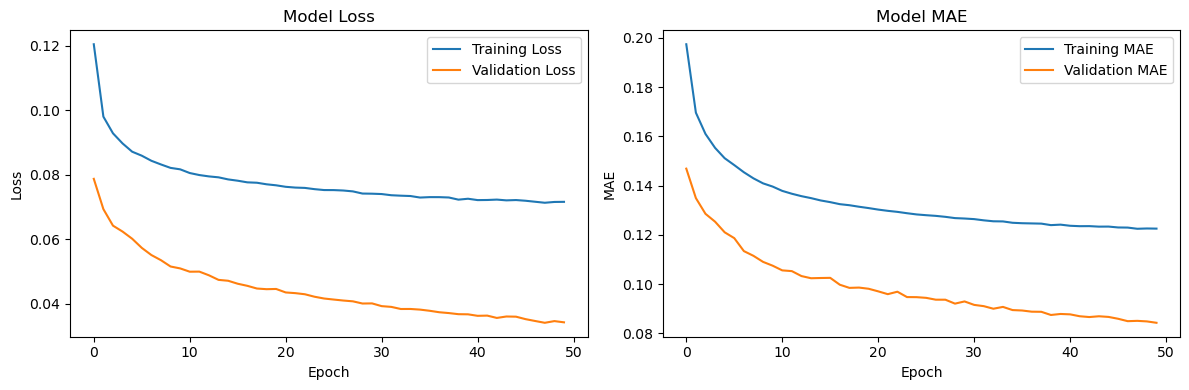


✅ MAE 인코더가 성공적으로 학습되었습니다!
인코더 출력 차원: (None, 64)


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop

class MaskingLayer(layers.Layer):
    def __init__(self, mask_ratio=0.5, **kwargs):
        super(MaskingLayer, self).__init__(**kwargs)
        self.mask_ratio = mask_ratio
        
    def call(self, inputs, training=None):
        if training:
            # 학습 시에만 마스킹 적용
            mask = tf.random.uniform(shape=tf.shape(inputs)) > self.mask_ratio
            masked_inputs = tf.where(mask, inputs, tf.zeros_like(inputs))
            return masked_inputs
        else:
            # 평가 시에는 마스킹하지 않음
            return inputs

def build_encoder(input_shape):
   inputs = layers.Input(shape=input_shape)
   x = layers.Dense(256, activation='relu')(inputs)
   x = layers.Dropout(0.3)(x)
   x = layers.Dense(128, activation='relu')(x)
   x = layers.Dropout(0.2)(x)
   x = layers.Dense(64, activation='relu')(x)
   x = layers.Dropout(0.1)(x)
   latent = layers.Dense(64, activation='relu')(x)
   return models.Model(inputs, latent, name='encoder')
   
def build_decoder(latent_shape, output_dim):
   inputs = layers.Input(shape=latent_shape)
   x = layers.Dense(64, activation='relu')(inputs)
   x = layers.Dropout(0.1)(x)
   x = layers.Dense(128, activation='relu')(x)
   x = layers.Dropout(0.2)(x)
   x = layers.Dense(256, activation='relu')(x)
   x = layers.Dropout(0.3)(x)
   outputs = layers.Dense(output_dim, activation=None)(x)
   return models.Model(inputs, outputs, name='decoder')

def build_mae_model(input_shape, mask_ratio=0.5):
    """개선된 MAE 모델 구축"""
    
    # 입력 차원
    input_dim = input_shape[0] if isinstance(input_shape, tuple) else input_shape
    
    # 모델 구성
    inputs = layers.Input(shape=(input_dim,))
    
    # 마스킹 (학습 시에만)
    masked_inputs = MaskingLayer(mask_ratio=mask_ratio)(inputs)
    
    # 인코더-디코더
    encoder = build_encoder((input_dim,))
    decoder = build_decoder((64,), input_dim)
    
    latent = encoder(masked_inputs)
    reconstructed = decoder(latent)
    
    # 전체 모델
    autoencoder = models.Model(inputs, reconstructed, name='mae_autoencoder')
    
    return autoencoder, encoder, decoder

def train_mae_model(X_train, X_val, mask_ratio=0.5, epochs=50, batch_size=64):
    """MAE 모델 학습"""
    
    # 데이터 전처리
    if hasattr(X_train, 'toarray'):
        X_train = X_train.toarray()
    if hasattr(X_val, 'toarray'):
        X_val = X_val.toarray()
    
    input_shape = X_train.shape[1]
    
    # 모델 구축
    autoencoder, encoder, decoder = build_mae_model(input_shape, mask_ratio)
    
    # 컴파일 (MSE 손실 사용 - MAE의 표준)
    autoencoder.compile(
        optimizer=RMSprop(learning_rate=0.001), 
        loss='mse',  # 표준 MSE 사용
        metrics=['mae']
    )
    
    # 조기 종료
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    )
    
    print("MAE 모델 학습 시작...")
    print(f"입력 차원: {input_shape}")
    print(f"마스크 비율: {mask_ratio}")
    
    # 학습
    history = autoencoder.fit(
        X_train, X_train,
        validation_data=(X_val, X_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stopping],
        verbose=1
    )
    
    print(f"최종 학습 손실: {history.history['loss'][-1]:.4f}")
    print(f"최종 검증 손실: {history.history['val_loss'][-1]:.4f}")
    
    return autoencoder, encoder, decoder, history

# 사용 예시
print("="*50)
print("개선된 MAE 모델 학습")
print("="*50)

autoencoder, mae_encoder, decoder, history = train_mae_model(
    X_train, X_val, 
    mask_ratio=0.5, 
    epochs=50, 
    batch_size=64
)

# 학습 결과 시각화 (선택사항)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

print("\n✅ MAE 인코더가 성공적으로 학습되었습니다!")
print(f"인코더 출력 차원: {mae_encoder.output_shape}")

Federated Learning: 병원별 MAE+ANN 성능 분석
발견된 병원: ['OPO1' 'OPO2' 'OPO3' 'OPO4' 'OPO5' 'OPO6']
OPO1: 32148개 샘플
OPO2: 16145개 샘플
OPO3: 12514개 샘플
OPO4: 33641개 샘플
OPO5: 15738개 샘플
OPO6: 22915개 샘플

MAE+ANN Federated Learning 시작...

Federated Learning MAE+ANN 모델 학습
참여 병원 수: 6
학습 라운드 수: 3

--- Round 1/3 ---

OPO1 학습 중...

OPO2 학습 중...

OPO3 학습 중...

OPO4 학습 중...

OPO5 학습 중...

OPO6 학습 중...
글로벌 가중치 업데이트 완료 (6개 클라이언트)

--- Round 2/3 ---

OPO1 학습 중...

OPO2 학습 중...

OPO3 학습 중...

OPO4 학습 중...

OPO5 학습 중...

OPO6 학습 중...
글로벌 가중치 업데이트 완료 (6개 클라이언트)

--- Round 3/3 ---

OPO1 학습 중...
  F1: 0.904, Precision: 0.867, Recall: 0.943, AUC: 0.996

OPO2 학습 중...
  F1: 0.855, Precision: 0.796, Recall: 0.923, AUC: 0.995

OPO3 학습 중...
  F1: 0.822, Precision: 0.770, Recall: 0.881, AUC: 0.995

OPO4 학습 중...
  F1: 0.818, Precision: 0.762, Recall: 0.883, AUC: 0.992

OPO5 학습 중...
  F1: 0.870, Precision: 0.835, Recall: 0.907, AUC: 0.994

OPO6 학습 중...
  F1: 0.854, Precision: 0.822, Recall: 0.887, AUC: 0.996
글로벌 가중치 업데이트 완료 (6

C:\Users\이희창\AppData\Local\Temp\ipykernel_9840\488701607.py:268: UserWarning: Glyph 48337 (\N{HANGUL SYLLABLE BYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\이희창\AppData\Local\Temp\ipykernel_9840\488701607.py:268: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\이희창\AppData\Local\Temp\ipykernel_9840\488701607.py:268: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\이희창\AppData\Local\Temp\ipykernel_9840\488701607.py:268: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\이희창\AppData\Local\Temp\ipykernel_9840\488701607.py:268: UserWarning: Glyph 45733 (\N{HANGUL SYLLABLE NEUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\이희창\AppData\Local\Temp\ipykernel_9840\488701607.py:268: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s

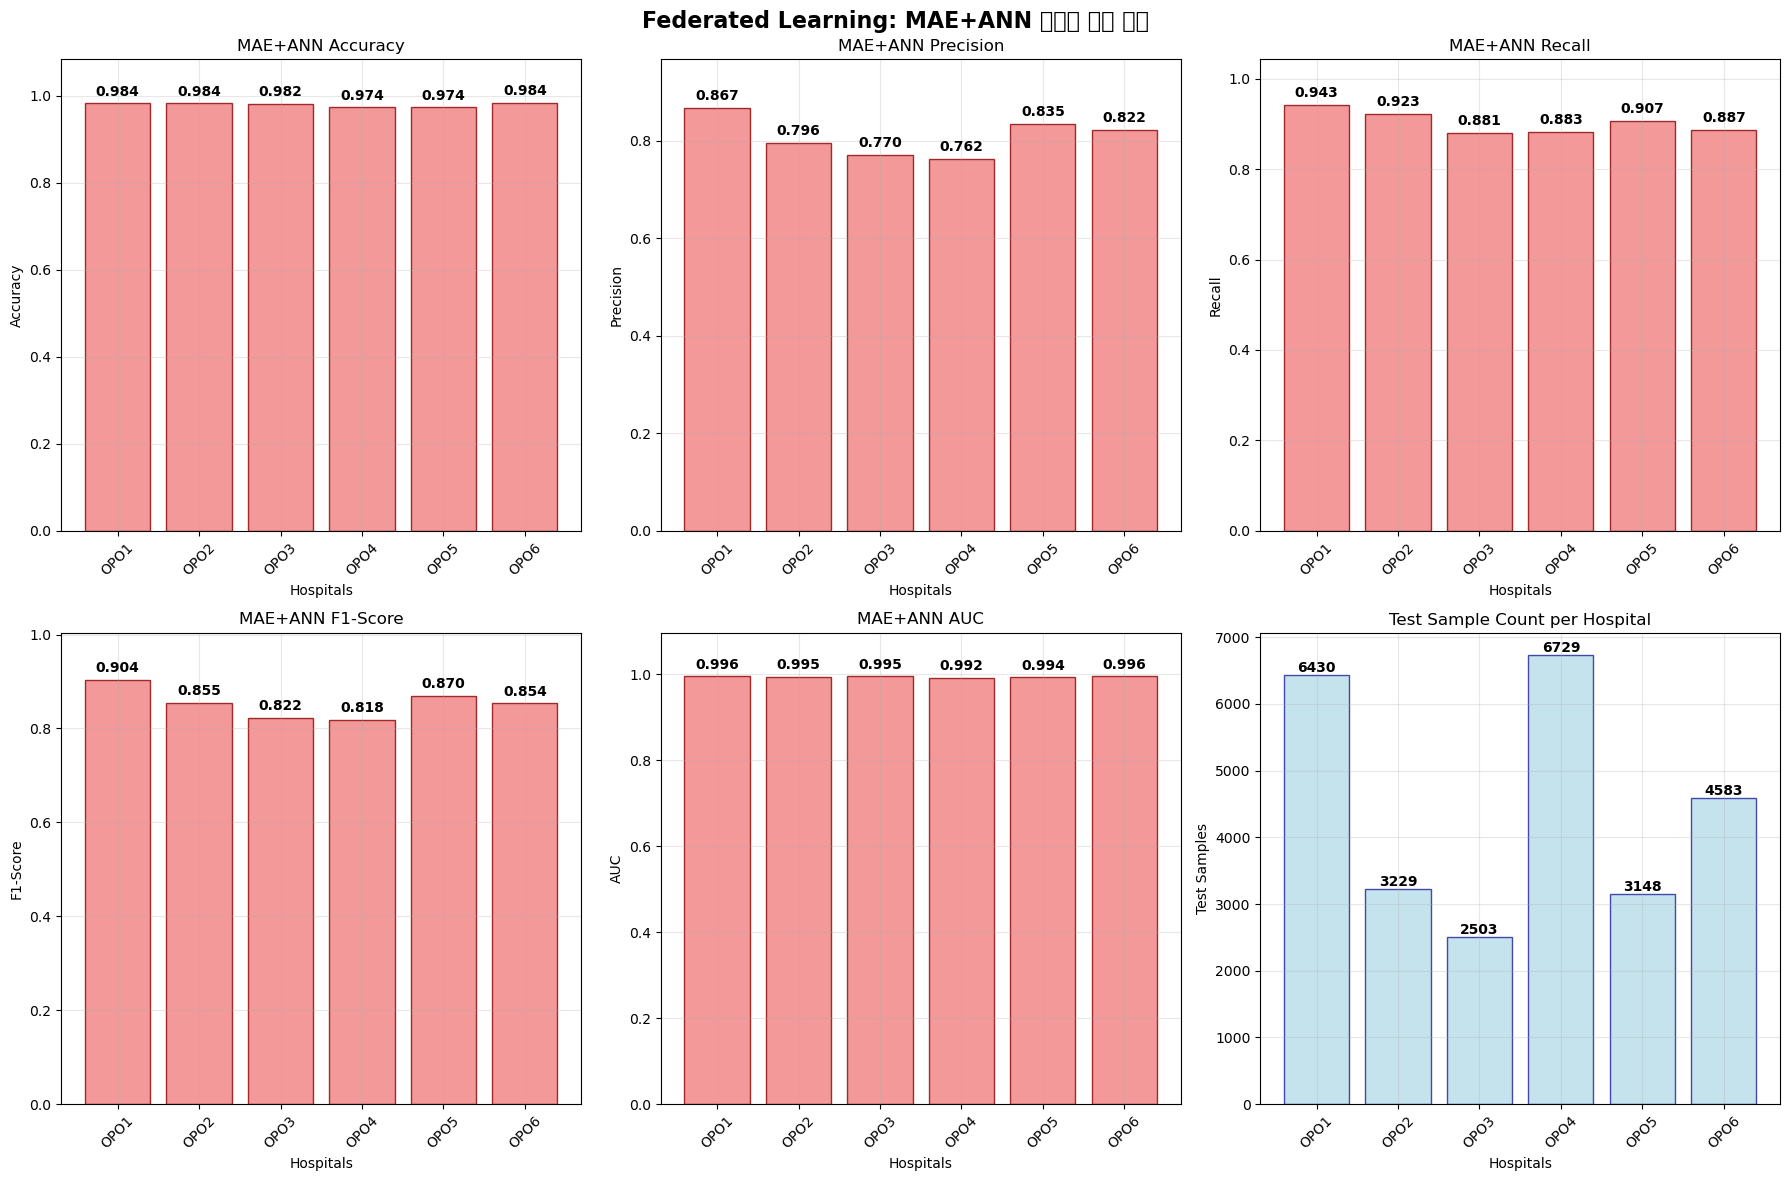

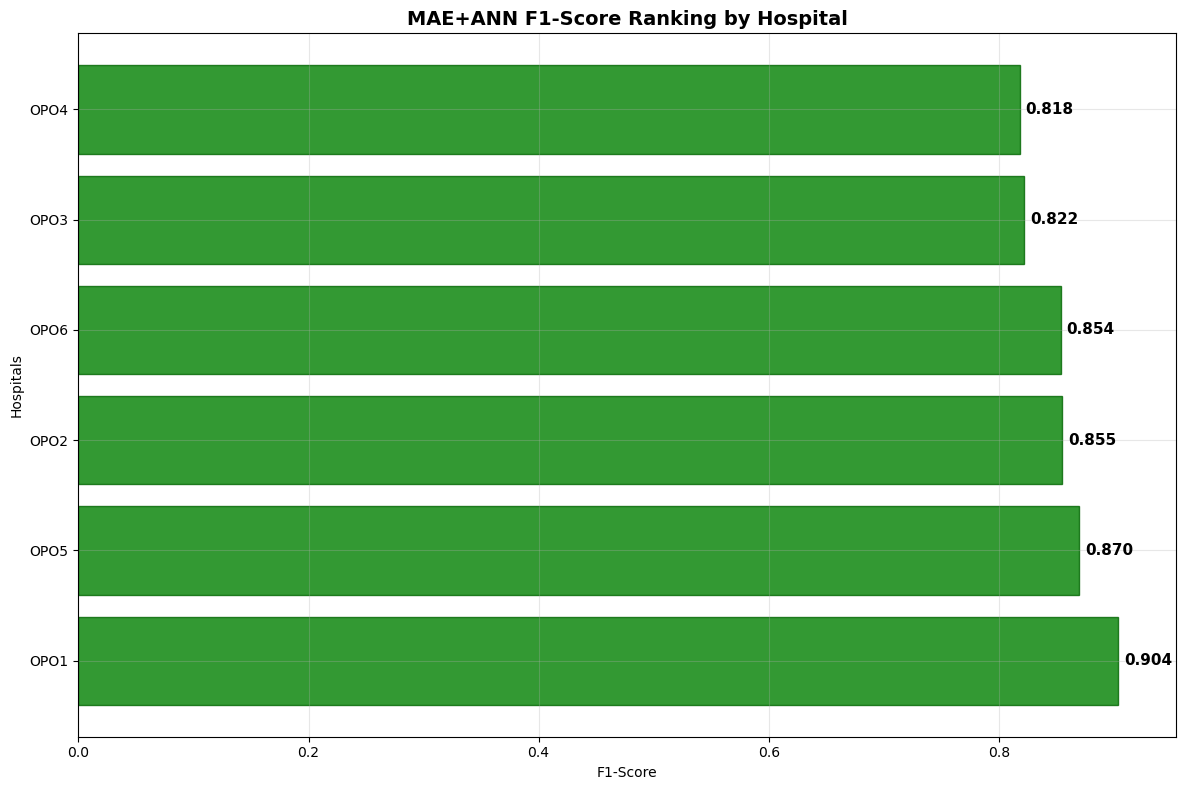


✅ Federated Learning 완료!
참여 병원 수: 6
각 병원별로 MAE+ANN 모델을 협력 학습했습니다.


In [4]:
import time
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model, clone_model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
import seaborn as sns

def to_dense(data):
    if hasattr(data, 'toarray'):
        return data.toarray()
    return data

def split_data_by_hospital(X, y, df_original):
    """OPO별로 데이터 분리"""
    hospitals = {}
    
    # OPO 컬럼이 있는지 확인
    if 'OPO' in df_original.columns:
        opo_col = 'OPO'
    else:
        # OPO 관련 컬럼 찾기
        opo_cols = [col for col in df_original.columns if 'OPO' in col.upper()]
        if opo_cols:
            opo_col = opo_cols[0]
        else:
            # 임시로 병원 ID 생성 (실제 데이터에서는 실제 병원 컬럼 사용)
            print("OPO 컬럼을 찾을 수 없어 임시로 병원 ID를 생성합니다.")
            n_samples = len(y)
            hospital_ids = np.random.choice(['OPO1', 'OPO2', 'OPO3', 'OPO4', 'OPO5', 'OPO6'], 
                                          size=n_samples, 
                                          p=[0.2, 0.15, 0.18, 0.17, 0.15, 0.15])
            opo_values = hospital_ids
    
    if 'opo_values' not in locals():
        opo_values = df_original[opo_col].values
    
    # 각 병원별로 데이터 분리
    unique_hospitals = np.unique(opo_values)
    print(f"발견된 병원: {unique_hospitals}")
    
    for hospital in unique_hospitals:
        if hospital in ['OPO1', 'OPO2', 'OPO3', 'OPO4', 'OPO5', 'OPO6']:
            mask = opo_values == hospital
            X_hospital = X[mask]
            y_hospital = y[mask]
            
            if len(y_hospital) > 10:  # 최소 샘플 수 확인
                hospitals[hospital] = {
                    'X': X_hospital,
                    'y': y_hospital,
                    'size': len(y_hospital)
                }
                print(f"{hospital}: {len(y_hospital)}개 샘플")
    
    return hospitals

class FederatedLearningCoordinator:
    def __init__(self):
        self.global_weights = None
        self.client_weights = []
        
    def aggregate_weights(self, client_weights_list):
        """클라이언트 가중치들을 평균화하여 글로벌 가중치 생성"""
        if not client_weights_list:
            return None
            
        # 각 레이어별로 가중치 평균화
        global_weights = []
        for layer_idx in range(len(client_weights_list[0])):
            layer_weights = [weights[layer_idx] for weights in client_weights_list]
            avg_weights = np.mean(layer_weights, axis=0)
            global_weights.append(avg_weights)
            
        return global_weights
    
    def update_global_weights(self, client_weights_list):
        """글로벌 가중치 업데이트"""
        self.global_weights = self.aggregate_weights(client_weights_list)
        return self.global_weights

def create_mae_ann_model(input_dim):
    """MAE+ANN 모델 생성"""
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(64, activation='relu'),
        Dropout(0.15),
        Dense(32, activation='relu'),
        Dropout(0.07),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.0007), 
                 loss='binary_crossentropy', 
                 metrics=['accuracy'])
    return model

def train_federated_mae_model(hospitals_data, encoder, n_rounds=5):
    """Federated Learning으로 MAE+ANN 모델 학습"""
    coordinator = FederatedLearningCoordinator()
    hospital_results = {}
    
    print(f"\n{'='*60}")
    print(f"Federated Learning MAE+ANN 모델 학습")
    print(f"{'='*60}")
    print(f"참여 병원 수: {len(hospitals_data)}")
    print(f"학습 라운드 수: {n_rounds}")
    
    for round_num in range(n_rounds):
        print(f"\n--- Round {round_num + 1}/{n_rounds} ---")
        client_weights = []
        
        for hospital_name, data in hospitals_data.items():
            print(f"\n{hospital_name} 학습 중...")
            
            # 데이터 분할
            X_hospital = data['X']
            y_hospital = data['y']
            
            if len(y_hospital) < 20:
                print(f"{hospital_name}: 샘플 수가 너무 적음 ({len(y_hospital)}개)")
                continue
            
            # 훈련/검증/테스트 분할
            X_temp, X_test, y_temp, y_test = train_test_split(
                X_hospital, y_hospital, test_size=0.2, random_state=42, stratify=y_hospital
            )
            
            if len(y_temp) < 10:
                print(f"{hospital_name}: 훈련 샘플 수가 너무 적음")
                continue
                
            X_train, X_val, y_train, y_val = train_test_split(
                X_temp, y_temp, test_size=0.25, random_state=42, 
                stratify=y_temp if len(np.unique(y_temp)) > 1 else None
            )
            
            # 데이터 전처리
            X_train_dense = to_dense(X_train)
            X_val_dense = to_dense(X_val)
            X_test_dense = to_dense(X_test)
            
            # MAE 인코딩된 특성 추가
            X_train_encoded = encoder.predict(X_train_dense, verbose=0)
            X_val_encoded = encoder.predict(X_val_dense, verbose=0)
            X_test_encoded = encoder.predict(X_test_dense, verbose=0)
            
            X_train_combined = tf.concat([X_train_dense, X_train_encoded], axis=-1)
            X_val_combined = tf.concat([X_val_dense, X_val_encoded], axis=-1)
            X_test_combined = tf.concat([X_test_dense, X_test_encoded], axis=-1)
            
            input_dim = X_train_combined.shape[1]
            model = create_mae_ann_model(input_dim)
            
            # 글로벌 가중치가 있으면 적용
            if coordinator.global_weights is not None:
                model.set_weights(coordinator.global_weights)
            
            # 로컬 학습
            early_stopping = EarlyStopping(monitor='val_loss', patience=5, 
                                         restore_best_weights=True, verbose=0)
            
            history = model.fit(
                X_train_combined, y_train,
                validation_data=(X_val_combined, y_val),
                epochs=20,  # Federated learning에서는 적은 epoch 사용
                batch_size=32,
                callbacks=[early_stopping],
                verbose=0
            )
            
            # 로컬 가중치 수집
            client_weights.append(model.get_weights())
            
            # 성능 평가 (마지막 라운드에서만)
            if round_num == n_rounds - 1:
                y_test_prob = model.predict(X_test_combined, verbose=0).flatten()
                y_test_pred = (y_test_prob >= 0.5).astype(int)
                
                if len(np.unique(y_test)) > 1:  # 테스트 세트에 양성과 음성이 모두 있는 경우만
                    test_accuracy = accuracy_score(y_test, y_test_pred)
                    test_precision = precision_score(y_test, y_test_pred, zero_division=0)
                    test_recall = recall_score(y_test, y_test_pred, zero_division=0)
                    test_f1 = f1_score(y_test, y_test_pred, zero_division=0)
                    test_auc = roc_auc_score(y_test, y_test_prob) if len(np.unique(y_test)) > 1 else 0.5
                    
                    hospital_results[hospital_name] = {
                        'accuracy': test_accuracy,
                        'precision': test_precision,
                        'recall': test_recall,
                        'f1': test_f1,
                        'auc': test_auc,
                        'samples': len(y_test)
                    }
                    
                    print(f"  F1: {test_f1:.3f}, Precision: {test_precision:.3f}, Recall: {test_recall:.3f}, AUC: {test_auc:.3f}")
        
        # 글로벌 가중치 업데이트
        if client_weights:
            coordinator.update_global_weights(client_weights)
            print(f"글로벌 가중치 업데이트 완료 ({len(client_weights)}개 클라이언트)")
    
    return hospital_results

def plot_mae_results(mae_results):
    """MAE+ANN 결과 시각화"""
    hospitals = list(mae_results.keys())
    
    if not hospitals:
        print("시각화할 병원 데이터가 없습니다.")
        return
    
    # 성능 지표별 시각화
    metrics = ['accuracy', 'precision', 'recall', 'f1', 'auc']
    metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Federated Learning: MAE+ANN 병원별 성능 분석', fontsize=16, fontweight='bold')
    
    for idx, (metric, metric_name) in enumerate(zip(metrics, metric_names)):
        row = idx // 3
        col = idx % 3
        ax = axes[row, col]
        
        scores = [mae_results[hospital][metric] for hospital in hospitals]
        
        # 막대 그래프
        bars = ax.bar(hospitals, scores, alpha=0.8, color='lightcoral', edgecolor='darkred')
        
        ax.set_xlabel('Hospitals')
        ax.set_ylabel(metric_name)
        ax.set_title(f'MAE+ANN {metric_name}')
        ax.grid(True, alpha=0.3)
        
        # 값 표시
        for bar, score in zip(bars, scores):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{score:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
        
        # y축 범위 조정
        ax.set_ylim(0, min(1.1, max(scores) + 0.1))
        plt.setp(ax.get_xticklabels(), rotation=45)
    
    # 마지막 subplot: 샘플 수 표시
    ax = axes[1, 2]
    sample_counts = [mae_results[hospital]['samples'] for hospital in hospitals]
    
    bars = ax.bar(hospitals, sample_counts, alpha=0.7, color='lightblue', edgecolor='darkblue')
    ax.set_xlabel('Hospitals')
    ax.set_ylabel('Test Samples')
    ax.set_title('Test Sample Count per Hospital')
    ax.grid(True, alpha=0.3)
    
    # 값 표시
    for bar, count in zip(bars, sample_counts):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 1,
               f'{count}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    plt.setp(ax.get_xticklabels(), rotation=45)
    plt.tight_layout()
    plt.show()
    
    # 추가: 성능 순위 차트
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    
    # F1 점수 기준으로 정렬
    sorted_hospitals = sorted(hospitals, key=lambda h: mae_results[h]['f1'], reverse=True)
    f1_scores = [mae_results[hospital]['f1'] for hospital in sorted_hospitals]
    
    bars = ax.barh(sorted_hospitals, f1_scores, alpha=0.8, color='green', edgecolor='darkgreen')
    ax.set_xlabel('F1-Score')
    ax.set_ylabel('Hospitals')
    ax.set_title('MAE+ANN F1-Score Ranking by Hospital', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # 값 표시
    for bar, score in zip(bars, f1_scores):
        width = bar.get_width()
        ax.text(width + 0.005, bar.get_y() + bar.get_height()/2.,
               f'{score:.3f}', ha='left', va='center', fontsize=11, fontweight='bold')
    
    ax.set_xlim(0, min(1.0, max(f1_scores) + 0.05))
    plt.tight_layout()
    plt.show()

# 실행 코드
print("="*60)
print("Federated Learning: 병원별 MAE+ANN 성능 분석")
print("="*60)

# 병원별 데이터 분리
hospitals_data = split_data_by_hospital(X_preprocessed, y, df_new)

if len(hospitals_data) == 0:
    print("병원 데이터를 찾을 수 없습니다. 임시 데이터로 시연합니다.")
    # 임시로 데이터를 6개 병원으로 분할
    n_samples = len(y)
    n_hospitals = 6
    samples_per_hospital = n_samples // n_hospitals
    
    hospitals_data = {}
    for i in range(n_hospitals):
        start_idx = i * samples_per_hospital
        end_idx = (i + 1) * samples_per_hospital if i < n_hospitals - 1 else n_samples
        
        hospital_name = f'OPO{i+1}'
        hospitals_data[hospital_name] = {
            'X': X_preprocessed[start_idx:end_idx],
            'y': y.iloc[start_idx:end_idx],
            'size': end_idx - start_idx
        }
        print(f"{hospital_name}: {end_idx - start_idx}개 샘플")

# MAE+ANN Federated Learning 학습
print("\nMAE+ANN Federated Learning 시작...")
mae_ann_results = train_federated_mae_model(hospitals_data, encoder=mae_encoder, n_rounds=3)

# 결과 출력
print("\n" + "="*80)
print("병원별 MAE+ANN 성능 결과")
print("="*80)

if mae_ann_results:
    print(f"{'병원':<8} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'AUC':<10} {'Samples':<8}")
    print("-" * 80)
    
    for hospital in sorted(mae_ann_results.keys()):
        result = mae_ann_results[hospital]
        print(f"{hospital:<8} {result['accuracy']:<10.3f} {result['precision']:<10.3f} {result['recall']:<10.3f} {result['f1']:<10.3f} {result['auc']:<10.3f} {result['samples']:<8}")
    
    # 전체 평균 성능
    print(f"\n전체 평균 성능:")
    avg_f1 = np.mean([mae_ann_results[h]['f1'] for h in mae_ann_results.keys()])
    avg_precision = np.mean([mae_ann_results[h]['precision'] for h in mae_ann_results.keys()])
    avg_recall = np.mean([mae_ann_results[h]['recall'] for h in mae_ann_results.keys()])
    avg_auc = np.mean([mae_ann_results[h]['auc'] for h in mae_ann_results.keys()])
    
    print(f"평균 F1-Score: {avg_f1:.3f}")
    print(f"평균 Precision: {avg_precision:.3f}")
    print(f"평균 Recall: {avg_recall:.3f}")
    print(f"평균 AUC: {avg_auc:.3f}")
    
    # 최고/최저 성능 병원
    best_hospital = max(mae_ann_results.keys(), key=lambda h: mae_ann_results[h]['f1'])
    worst_hospital = min(mae_ann_results.keys(), key=lambda h: mae_ann_results[h]['f1'])
    
    print(f"\n🏆 최고 성능 병원: {best_hospital} (F1: {mae_ann_results[best_hospital]['f1']:.3f})")
    print(f"📈 최저 성능 병원: {worst_hospital} (F1: {mae_ann_results[worst_hospital]['f1']:.3f})")
    print(f"성능 차이: {(mae_ann_results[best_hospital]['f1'] - mae_ann_results[worst_hospital]['f1'])*100:.1f}%")
    
    # 시각화
    plot_mae_results(mae_ann_results)
    
else:
    print("학습 결과가 없습니다.")

print(f"\n✅ Federated Learning 완료!")
print(f"참여 병원 수: {len(mae_ann_results)}")
print(f"각 병원별로 MAE+ANN 모델을 협력 학습했습니다.")